This notebook outlines the content convered in the Scikit-Learn Introduction.

It's a quick stop to see all the Scikit-Learn functions and modules for each section outlined.

What we're covering follows the following diagram detailing a Scikit-Learn workflow.

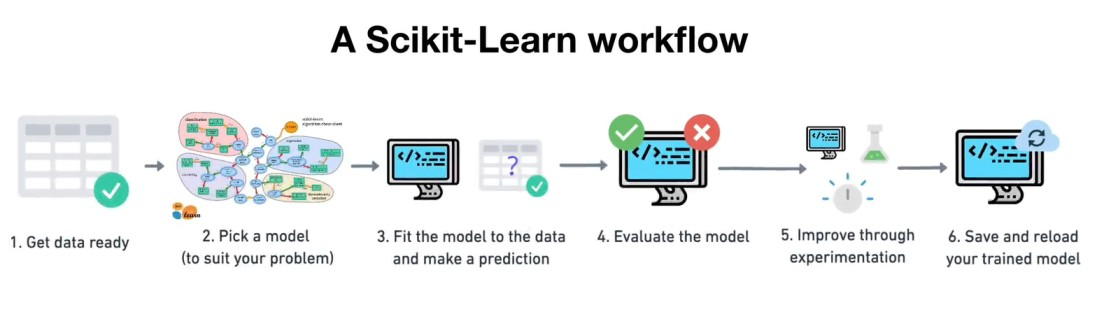


## 0. Standard library imports

For all machine learning projects, you'll often see these libraries (Matplotlib, NumPy and pandas) imported at the top.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We'll use 2 datasets for demonstration purposes.
* `heart_disease` - a classification dataset (predicting whether someone has heart disease or not)

* `boston_df` - a regression dataset (predicting the median house prices of cities in Boston)

In [3]:
# Classification data
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 1. Get the data ready
Split data into X & y


In [8]:
# Create X (features matrix)
X = heart_disease.drop('target', axis=1)

# Create y (labels)
y = heart_disease['target']

## 2. Pick a model/estimator (to suit your problem)
To pick a model we use the [Scikit-Learn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

<img src="https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/images/sklearn-ml-map.png" width=400/>

**Notes:** 
1. Scikit-Learn refers to machine learning models and algorithms as estimators.
2. "Hyperparameters" are like dials on a model that you can tune to make it better or worse


In [12]:
# Random Forest Classifier (for classification problems)
# "RandomForestClassifier" from sklearn.ensemble is a classification ML model. So, it is capable of learning patterns
# and data and then classifying whether a sample (i.e a row) is one thing or another thing.

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier() # Instantiating a Random Forest Classifier (clf short for classifier)

In [14]:
# get_params() will list the hyperparameters. For now, we'll keep default hyperparameters.

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 3. Fit the model to the data and make a prediction

In [15]:
# We need to split our data into training and test, we can do that using 'train_test_split'

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 0.2 = 20% will be used for testing & 80% for training

In [16]:
# we want now the classification model to find the pattern within our training data. Basically our model is fitting to the data.
clf.fit(X_train, y_train);

In [18]:
# make a prediction -- !!!! We cannot make a prediction on things that aren't the same shape !!!! 
# y_preds = clf.predict(np.array([0, 2, 3, 4]))   # ValueError: Expected 2D array, got 1D array instead:

In [19]:
# make a prediction
y_preds = clf.predict(X_test)

y_preds

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

## 4. Evaluate the model

Every Scikit-Learn model has a default metric which is accessible through the `score()` function.

However there are a range of different evaluation metrics you can use depending on the model you're using.

A full list of evaluation metrics can be [found in the documentation](https://scikit-learn.org/stable/modules/model_evaluation.html).

In [24]:
# **** 4. Evaludate the model on the training data and test data ****
# All models/estimators have a `score()` method
# clf.score returns the mean accuracy on the given test data and labels. 
# Below we got 1.0 on the training data means the model has done 100% on our training data.
# It means the model has found patterns in the training data so well that it's got 100%
# Because it got trained on X (which is features matrix) as well as Y (which is label), so it had a chance to correct itself
# if it got something wrong, but it performs 83% accuracy means it gets 3 out of 4 predictions correct on the test data because 
# it's never seen that data nor has it ever seen the labels.

# Checking the score on training data
clf.score(X_train, y_train)  # 1.0

1.0

In [25]:
# Checking the score on test data
clf.score(X_test, y_test)  # 0.819672131147541 (83%)

0.819672131147541

In [32]:
# Different classification metrics

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))  # We are going to get little more insight rather than just accuracy.

# Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_preds))  # 0.819672131147541

# Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds))  # [[15  6] [ 5 35]]

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        21
           1       0.85      0.88      0.86        40

    accuracy                           0.82        61
   macro avg       0.80      0.79      0.80        61
weighted avg       0.82      0.82      0.82        61

0.819672131147541
[[15  6]
 [ 5 35]]


## 5. Improve through experimentation

Two of the main methods to improve a models baseline metrics (the first evaluation metrics you get).

From a data perspective asks:
* Could we collect more data? In machine learning, more data is generally better, as it gives a model more opportunities to learn patterns.
* Could we improve our data? This could mean filling in misisng values or finding a better encoding (turning things into numbers) strategy.

From a model perspective asks:
* Is there a better model we could use? If you've started out with a simple model, could you use a more complex one? (we saw an example of this when looking at the [Scikit-Learn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), ensemble methods are generally considered more complex models)
* Could we improve the current model? If the model you're using performs well straight out of the box, can the **hyperparameters** be tuned to make it even better?

**Hyperparameters** are like settings on a model you can adjust so some of the ways it uses to find patterns are altered and potentially improved. Adjusting hyperparameters is referred to as hyperparameter tuning.

In [34]:
np.random.seed(42) # so that our results are replicable

for i in range(10, 100, 10):
    # Loop through 10,20 and all the way up to 100 estimators because we're trying to figure out if we can improve
    # our model by adjusting one of our hyper parameters.
    print(f'Trying model with {i} estimators...')
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)  # learning on training data
    print(f'Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%') # evaluate on test data
    print("")

# We can see below that 20 estimators is the best for our model because they've got the highest accuracy.

Trying model with 10 estimators...
Model accuracy on test set: 75.41%

Trying model with 20 estimators...
Model accuracy on test set: 85.25%

Trying model with 30 estimators...
Model accuracy on test set: 81.97%

Trying model with 40 estimators...
Model accuracy on test set: 90.16%

Trying model with 50 estimators...
Model accuracy on test set: 83.61%

Trying model with 60 estimators...
Model accuracy on test set: 83.61%

Trying model with 70 estimators...
Model accuracy on test set: 81.97%

Trying model with 80 estimators...
Model accuracy on test set: 83.61%

Trying model with 90 estimators...
Model accuracy on test set: 85.25%



## 6. Save and reload your trained model
You can save and load a model with `pickle`.

In [35]:
# **** 6. Save a model and load it ****
# We can save the model using pickle library
import pickle
pickle.dump(clf, open('random_forest_model_1.pkl', 'wb'))

In [36]:
# Load the saved model
loaded_model = pickle.loa d(open('random_forest_model_1.pkl', 'rb'))
loaded_model.score(X_test, y_test)  # 0.8524590163934426 same score as our recently trained model.

0.8524590163934426

## 1. Getting our data ready to be used with Machine Learning

Three main things we have to do:
1. Split the data into features and labels (usually `X` and `y`)
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values to non-numerical values (also called as feature encoding)

In [38]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

In [40]:
 # Split the data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# ((242, 13), (61, 13), (242,), (61,))  # 13 is the columns (i.e. features matrix) except target column

((242, 13), (61, 13), (242,), (61,))

# Clean Data → Transform Data → Reduce Data
Before we even create ML models, we need to do the below steps: 
1. Clean Data: We need to clean our data. Sometimes we want to remove/replace data as we might have tables with missing values, missing labels, etc. So, we might remove row/column or we might calculate some sort of average e.g. fill an empty price list to an average for a house. 
2. Transform Data: We want to transform data into some form that computer understands. We need to convert some of our information into numbers. E.g. The price of a house or salary are numbers are easy for us to create models with because understand numbers easily but it might find hard to understand what a color is, so we transform colors into numbers like RGB colors. Another example is tranforming heart disease is there or not to 1s and 0s.
3. Reduce Data: If we're able to get the same result on less data, that saves us money. Sometimes, the idea of data reduction is called as `Dimensionality Reduction` or `Column Reduction`.

## 1.1 Make sure it is all numerical

In [44]:
car_sales = pd.read_csv('car-sales-extended.csv')
len(car_sales)  # 1000
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


We are going to predict the "Price" of the car given some attributes about it

In [45]:
# Split into X/y
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']

In [46]:
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
# Build Machine Learning model

# RandomForestClassifier is used for predicting a classification problem.
# RandomForestRegressor same as RandomForestClassifier but it can predict a number.
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [51]:
# If I try to fit my data to model, I get ValueError because my ML model cannot deal with strings.

# model.fit(X_train, y_train)  # ValueError: could not convert string to float: 'Toyota'

#### One Hot Encoding

Before we move on let's see what is `One Hot Encoding`
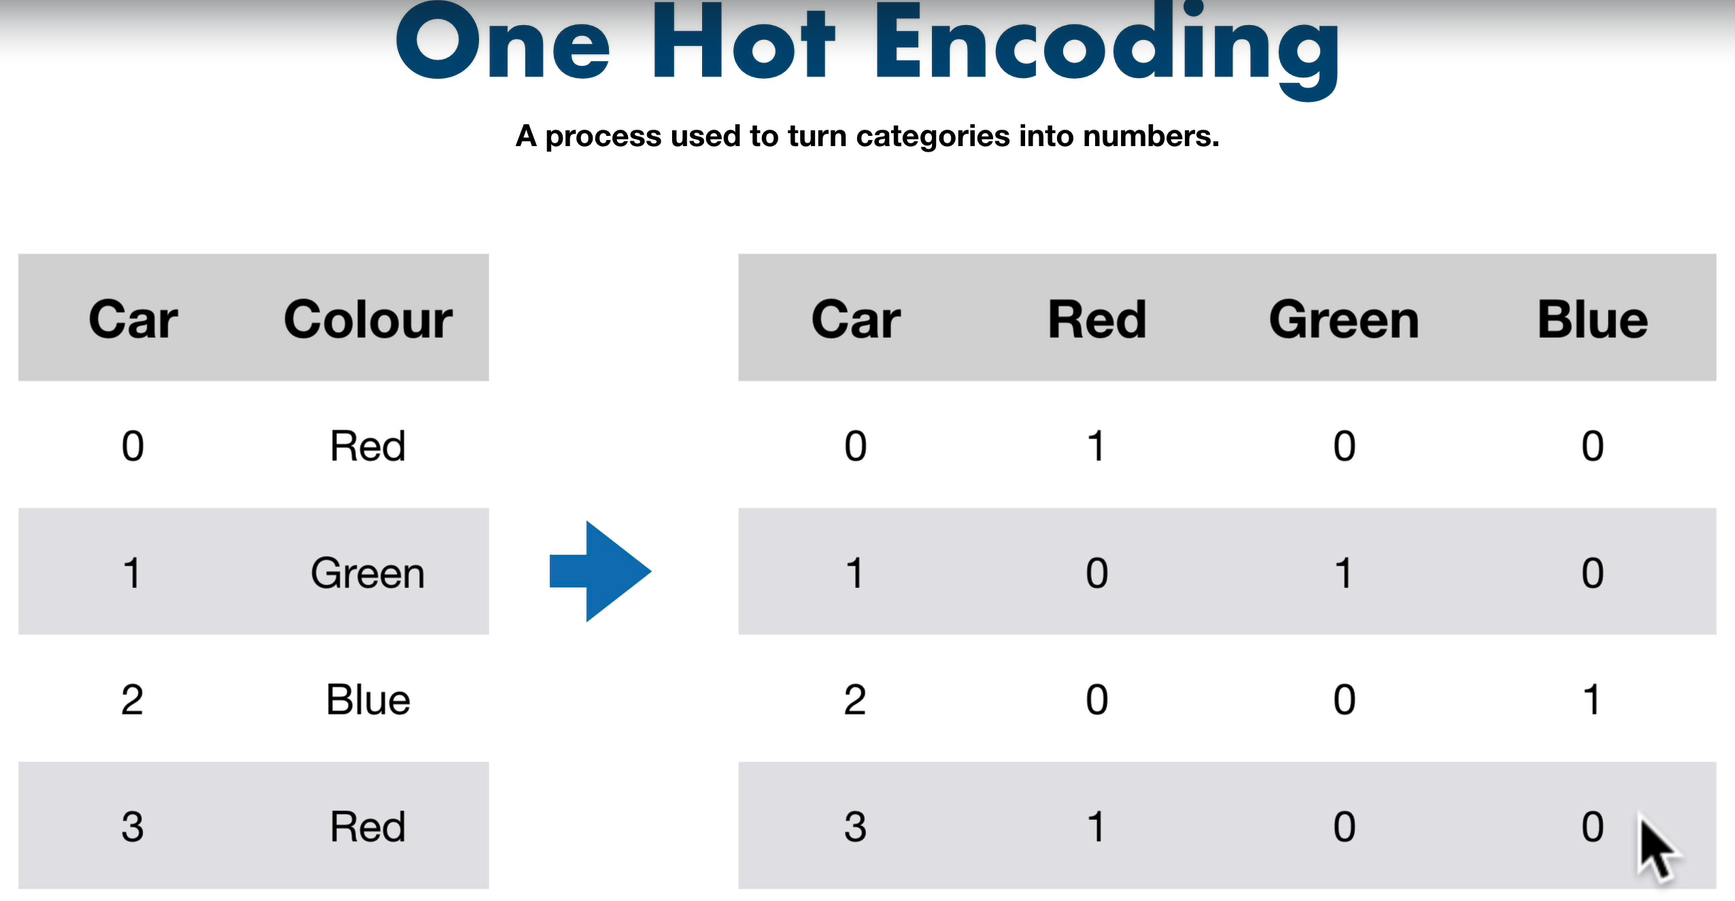
- Let's say we have four cars. So cars 0, 1, 2 and 3 and that colors are Red, Green, Blue and Red. 
- If we want it to one hot encode this, let's say we want to turn the 'Color' column into numbers. Below is what we will do.
- We've got car 0 and the color of car 0 is Red, so to transform our categories into numbers. So this is one hot encoding. So because zero, the color is red, it gets a 1 and it gets a 0 for the other two categories. The same goes on for other values.
- If you don't understand, watch this - https://www.udemy.com/course/complete-machine-learning-and-data-science-zero-to-mastery/learn/lecture/17322930?start=689#notes

In [55]:
# Turn categories (Make, Color, Doors) into numbers. Specifically, we say convert those to one hot encoded variables.

# NOTE: "car_sales['Doors']" is numerical but it is also categorical because
# let's say cars with 4 doors will fit into 856 cars which is one category, cars with 5 doors can fit into another category, etc

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)], remainder="passthrough" # pass the list of features we would like to transform
)

# The ColumnTransformer takes the OneHotEncoder and applies it to the categorical_features and for the remainder of the 
# columns just passthrough, meaning don't do anything to those.

transformed_X = transformer.fit_transform(X)  # Fitting our 'transformer' to our X data. ie. Transform X into numbers
transformed_X 

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [56]:
# Let's put into dataframe to see it clearly. What we have done is that we've encoded the different parameters of each row 
# into 0s and 1s. So, our data is all numerical.
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [59]:
# Not Recommended: One more way to transform Make, Colors and Doors into numbers

# we will use pd.get_dummies which is similar to one hot encoding
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies  # Note that Doors column is numerical and this didn't work properly here like OneHotEncoder

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [60]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor()

In [61]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?
1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [65]:
# Import the car sales missing data
car_sales_missing = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv')
car_sales_missing.isna().sum()  # to check how many missing values are there in each column

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [66]:
# Create X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing['Price']

In [67]:
# Turn categories to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)], remainder="passthrough"
)

transformed_X = transformer.fit_transform(X)  # Fitting our 'transformer' to our X data. ie. Transform X into numbers
transformed_X 

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

#### Option 1: Fill Missing Data With Pandas
- There is no perfect way for filling the missing data like you had really value.
- E.g.1 With missing value in a Numerical column, we might fill it with the mean like the average of that column. For instance, below we can see that for Odometer (KM) we have filled missing values with mean. 
- E.g.2 However, for Doors we see that the car_sales_missing's Door's value_counts() has more number of 4, so we will put 4. The reason is, let's say cars with 4 doors will fit into 856 cars which is one category, cars with 5 doors can fit into another category, etc. So, Doors is a separate category, so it is better to not use mean here.

NOTE: We won't fill the missing data for Price column because that is what we are trying to predict

In [72]:
# Fill the "Make" column
car_sales_missing['Make'].fillna('missing', inplace=True)

# Fill the "Colour" column
car_sales_missing['Colour'].fillna('missing', inplace=True)

# Fill the "Odometer" column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing['Doors'].fillna(4, inplace=True)

In [73]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [74]:
# Remove rows with missing Price values

# Above we saw that won't fill the missing data for "Price" column because is what we are trying to predict, so what we will
# do is to remove those rows that has missing "Price" values. We are going to lose some data but it's hard to predict 
# something when it doesn't have a label.

car_sales_missing.dropna(inplace=True)

In [75]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [77]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [88]:
# Turn categories to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)], remainder="passthrough"
)

transformed_X = transformer.fit_transform(X)  # Fitting our 'transformer' to our X data. ie. Transform X into numbers
transformed_X.toarray() # to see something visual, we can use .toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])